In [ ]:
#Importing the required libraries


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Churn_Modelling Ass2.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df['CreditScore'].value_counts

<bound method IndexOpsMixin.value_counts of 0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64>

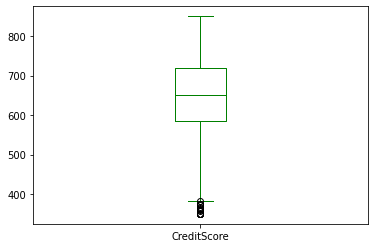

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(column=['CreditScore'],grid=False,color='green')

Text(0.5, 0, 'Tenure')

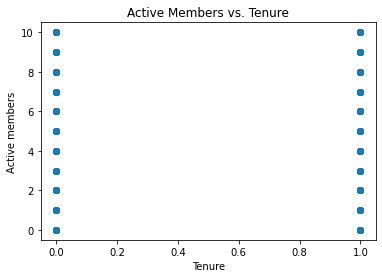

In [ ]:
#bivariate analysis
import matplotlib.pyplot as plt
plt.scatter(df.IsActiveMember ,df.Tenure)
plt.title('Active Members vs. Tenure')
plt.ylabel('Active members')
plt.xlabel('Tenure')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


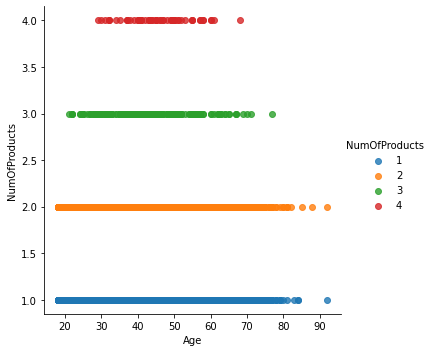

In [ ]:
import seaborn as sns
sns.lmplot('Age',"NumOfProducts",df,hue="NumOfProducts",fit_reg=False);

In [ ]:
import statistics as st
nums=[1,2,3,5,7]
st.mean(nums)

3.6

In [ ]:
nums=[1,2,3,7,5,6,7,7,9]
st.mode(nums)

7

In [ ]:
st.median(nums)

6

In [ ]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


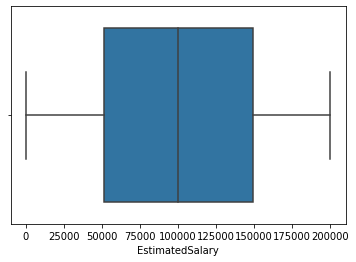

In [ ]:
import seaborn as sns
sns.boxplot(df['EstimatedSalary'],data=df)

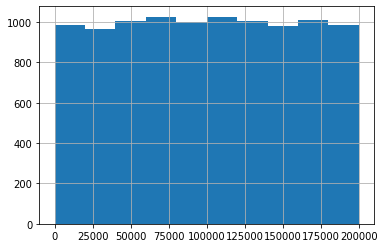

In [ ]:
df['EstimatedSalary'].hist()


In [ ]:
print('skewness value of age:',df['Age'].skew())
print('skewness value of EstimatedSalary:',df['EstimatedSalary'].skew());

skewness value of age: 1.0113202630234552
skewness value of EstimatedSalary: 0.0020853576615585162


In [ ]:
Q1=df['EstimatedSalary'].quantile(0.85)
Q3=df['EstimatedSalary'].quantile(0.75)
IQR=Q3 - Q1
whisker_width = 1.5
Fare_outliers = df[(df['EstimatedSalary']<Q1-whisker_width*IQR) |(df['EstimatedSalary']>Q3 + whisker_width*IQR)]
Fare_outliers.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
import pandas as pd
df=pd.read_csv('/content/Churn_Modelling Ass2.csv')
fare_mean = df['EstimatedSalary'].mean()
fare_std=df['EstimatedSalary'].std()
low=fare_mean-(1*fare_std)
high=fare_mean + (1*fare_std)
fare_outliers=df[(df['EstimatedSalary']<low)|(df['EstimatedSalary']>high)]
fare_outliers.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,1,1,14406.41,0


In [9]:
Q1=df['EstimatedSalary'].quantile(0.85)
Q3=df['EstimatedSalary'].quantile(0.75)
IQR=Q3 - Q1
whisker_width = 2.5
lower_whisker=Q1 -(whisker_width*IQR)
upper_whisker=Q3 +(whisker_width*IQR)
df['EstimatedSalary']=np.where(df['EstimatedSalary']>upper_whisker,upper_whisker,np.where(df['EstimatedSalary']<lower_whisker,lower_whisker,df['EstimatedSalary'))
sns.boxplot(df['EstimatedSalary'],data=df)

SyntaxError: ignored

In [11]:
df._get_numeric_data()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [12]:
cols=df.columns
num_cols=df._get_numeric_data().columns
num_cols

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
list(set(cols)-set(num_cols))

['Geography', 'Gender', 'Surname']

In [15]:
x=df.iloc[:,0:4].values
y=df.iloc[:,4:5].values

In [16]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScalar
scale= StandardScalar()
df=pandas.read_csv("Churn_Modelling.csv")
x=df[['Age','EstimatedSalary']]
scaledx=scale.fit_transform(x)
print(scaledx)

ImportError: ignored

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
xtrain

array([[7682, 15633608, 'Black', 641],
       [9032, 15742323, 'Barese', 541],
       [3692, 15760244, 'Ives', 590],
       ...,
       [3265, 15574372, 'Hoolan', 738],
       [9846, 15664035, 'Parsons', 590],
       [2733, 15592816, 'Udokamma', 623]], dtype=object)

In [18]:
ytrain

array([['France'],
       ['France'],
       ['France'],
       ...,
       ['France'],
       ['Spain'],
       ['Germany']], dtype=object)

In [19]:
xtest

array([[9395, 15615753, 'Upchurch', 597],
       [899, 15654700, 'Fallaci', 523],
       [2399, 15633877, 'Morrison', 706],
       ...,
       [9308, 15680405, "P'eng", 685],
       [8395, 15597983, 'Brown', 692],
       [5234, 15591286, 'Simmons', 731]], dtype=object)

In [20]:
ytest

array([['Germany'],
       ['France'],
       ['Spain'],
       ...,
       ['France'],
       ['France'],
       ['Germany']], dtype=object)